# Escolhe 6 números de forma aleatória para a sua fézinha. Lista também os números mais sorteados

In [216]:
import random
import pandas as pd
from collections import Counter
import collections
import matplotlib.pyplot as plt
import operator
from itertools import islice

In [185]:
df_numeros_sorteados = pd.read_csv('mega_sena_todos_concursos.csv', names=['n1', 'n2', 'n3', 'n4', 'n5', 'n6'])

In [186]:
def escolhe_numeros(numeros_prediletos=0):
    lista = []
    
    if type(numeros_prediletos) == int:
        for i in range(6):
            a = random.randrange(1, 61)
            if a not in lista:
                lista.append(a)
    else:
        lista = numeros_prediletos.copy()
        for i in range(6-len(lista)):
            a = random.randrange(1, 61)
            if a not in lista:
                lista.append(a)
    
    lista.sort()
    
    return lista

In [187]:
def acha_se_numeros_ja_foram_sorteados(df_numeros_sorteados, lista_numeros):
    for i in range(len(df_numeros_sorteados)):
        if set(df_numeros_sorteados.iloc[i]) == set(lista_numeros):
            return True
    return False

In [188]:
# numeros_da_sorte = [17, 23]
# x = escolhe_numeros(numeros_da_sorte)

x = escolhe_numeros()
acha_se_numeros_ja_foram_sorteados(df_numeros_sorteados, lista_numeros=x)

False

In [189]:
x

[19, 24, 25, 33, 54, 55]

In [237]:
acha_se_numeros_ja_foram_sorteados(df_numeros_sorteados, x)

False

In [232]:
def acha_numeros_mais_sorteados(df_numeros_sorteados):
    
    cols = ['n1', 'n2', 'n3', 'n4', 'n5', 'n6']

    results = []

    for i in cols:
        results += df_numeros_sorteados[i].tolist() # Add data to a list

    occurr = Counter(results)

    desc_order = dict(sorted(occurr.items(), key=operator.itemgetter(1),reverse=True))
    
    numeros_mais_sorteados = list(islice(desc_order, 6))
    
    numeros_mais_sorteados.sort()
    
    return desc_order, numeros_mais_sorteados

In [234]:
desc_order_dict, numeros_mais_sorteados = acha_numeros_mais_sorteados(df_numeros_sorteados)
numeros_mais_sorteados

[5, 10, 33, 37, 42, 53]

In [239]:
list(islice(desc_order_dict, 6))

[53, 10, 5, 37, 42, 33]

In [238]:
acha_se_numeros_ja_foram_sorteados(df_numeros_sorteados, numeros_mais_sorteados)

False

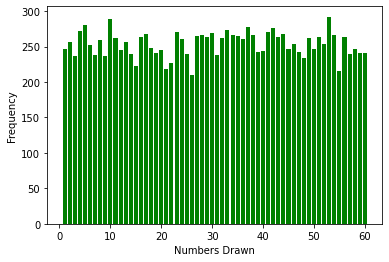

In [236]:
# Display histogram
plt.bar(list(desc_order_dict.keys()), desc_order_dict.values(), color='g')
plt.xlabel("Numbers Drawn")
plt.ylabel("Frequency")
plt.show()